In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import yfinance as yfin

yfin.pdr_override()
import datetime as dt

from sklearn.preprocessing import MinMaxScaler

from tensorflow import keras
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential





In [ ]:
company='AAPL'

start=dt.datetime(2012,1,1)
end=dt.datetime(2020,1,1)
data = yfin.download(company,start,end)

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days=60

x_train=[]
y_train=[]

for x in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x,0])
  y_train.append(scaled_data[x,0])
x_train,y_train=np.array(x_train),np.array(y_train)

[*********************100%***********************]  1 of 1 completed


In [ ]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

model=Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=25,batch_size=32)

Epoch 1/25
61/61 [==============================] - 10s 77ms/step - loss: 0.0154
Epoch 2/25
61/61 [==============================] - 6s 96ms/step - loss: 0.0025
Epoch 3/25
61/61 [==============================] - 5s 74ms/step - loss: 0.0021
Epoch 4/25
61/61 [==============================] - 8s 126ms/step - loss: 0.0021
Epoch 5/25
61/61 [==============================] - 8s 132ms/step - loss: 0.0018
Epoch 6/25
61/61 [==============================] - 7s 122ms/step - loss: 0.0018
Epoch 7/25
61/61 [==============================] - 5s 86ms/step - loss: 0.0017
Epoch 8/25
61/61 [==============================] - 6s 106ms/step - loss: 0.0016
Epoch 9/25
61/61 [==============================] - 6s 103ms/step - loss: 0.0016
Epoch 10/25
61/61 [==============================] - 7s 112ms/step - loss: 0.0014
Epoch 11/25
61/61 [==============================] - 6s 95ms/step - loss: 0.0014
Epoch 12/25
61/61 [==============================] - 8s 132ms/step - loss: 0.0014
Epoch 13/25
61/61 [==========

In [ ]:
test_start=dt.datetime(2020,1,1)
test_end=dt.datetime.now()
test_data=yfin.download(company,test_start,test_end)
actual_prices=test_data['Close'].values
total_dataset=pd.concat((data['Close'],test_data['Close']),axis=0)
model_inputs=total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs=model_inputs.reshape(-1,1)
model_inputs=scaler.transform(model_inputs)

x_test=[]

for x in range(prediction_days,len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x,0])

x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))



[*********************100%***********************]  1 of 1 completed


28/28 [==============================] - 3s 32ms/step


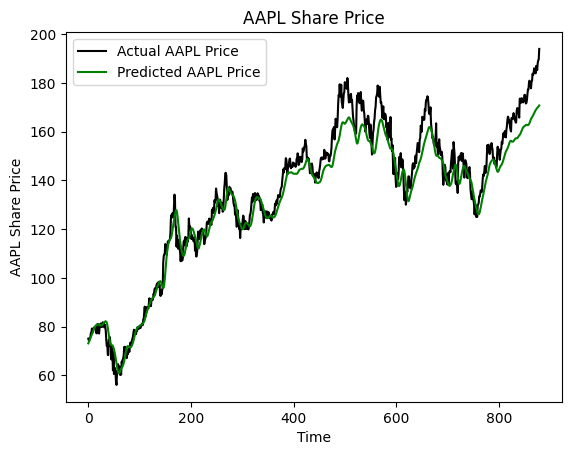

In [ ]:
predicted_prices=model.predict(x_test)
predicted_prices=scaler.inverse_transform(predicted_prices)

plt.plot(actual_prices,color="black",label=f"Actual {company} Price")
plt.plot(predicted_prices, color="green",label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price')
plt.legend()
plt.show()

In [ ]:
real_data=[model_inputs[len(model_inputs)+1-prediction_days:len(model_inputs+1),0]]

real_data=np.array(real_data)
real_data=np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))

prediction=model.predict(real_data)
prediction=scaler.inverse_transform(prediction)
print(f"Prediction: {prediction}")

1/1 [==============================] - 1s 1s/step
Prediction: [[171.2409]]
